<a href="https://colab.research.google.com/github/aparna-2001/machine_learning_using_python/blob/main/Descriptive_analysis_ipl_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

ipl_df = pd.read_csv('IPL IMB381IPL2013.csv')

In [3]:
ipl_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [4]:
ipl_df['PLAYER NAME'][0:5]

,PLAYER NAME
0,"Abdulla, YA"
1,Abdur Razzak
2,"Agarkar, AB"
3,"Ashwin, R"
4,"Badrinath, S"


In [5]:
ipl_df[['PLAYER NAME', 'COUNTRY']] [0:5]

,PLAYER NAME,COUNTRY
0,"Abdulla, YA",SA
1,Abdur Razzak,BAN
2,"Agarkar, AB",IND
3,"Ashwin, R",IND
4,"Badrinath, S",IND


In [6]:
ipl_df['COUNTRY'].value_counts(normalize= True) * 100

,proportion
COUNTRY,
IND,40.769231
AUS,16.923077
SA,12.307692
SL,9.230769
PAK,6.923077
NZ,5.384615
WI,4.615385
ENG,2.307692
BAN,0.769231


In [7]:
pd.crosstab(ipl_df['AGE'], ipl_df['PLAYING ROLE'])

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


In [8]:
ipl_df[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE')[0:5]

,PLAYER NAME,SOLD PRICE
73,"Noffke, AA",20000
46,Kamran Khan,24000
5,"Bailey, GJ",50000
0,"Abdulla, YA",50000
34,"Henriques, MC",50000


In [9]:
ipl_df[['PLAYER NAME', 'SOLD PRICE']].sort_values('SOLD PRICE', ascending = False) [0:5]

,PLAYER NAME,SOLD PRICE
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
93,"Sehwag, V",1800000
113,"Tiwary, SS",1600000


In [10]:
ipl_df['premium'] = ipl_df['SOLD PRICE'] - ipl_df['BASE PRICE']
ipl_df['premium']

,premium
0,0
1,0
2,150000
3,750000
4,700000
...,...
125,700000
126,0
127,1400000
128,250000


In [11]:
ipl_df[['PLAYER NAME', 'BASE PRICE', 'SOLD PRICE', 'premium']]

,PLAYER NAME,BASE PRICE,SOLD PRICE,premium
0,"Abdulla, YA",50000,50000,0
1,Abdur Razzak,50000,50000,0
2,"Agarkar, AB",200000,350000,150000
3,"Ashwin, R",100000,850000,750000
4,"Badrinath, S",100000,800000,700000
...,...,...,...,...
125,"Yadav, AS",50000,750000,700000
126,Younis Khan,225000,225000,0
127,Yuvraj Singh,400000,1800000,1400000
128,Zaheer Khan,200000,450000,250000


In [12]:
sold_price_by_age = ipl_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()

In [13]:
sold_price_by_age_role = ipl_df.groupby(['AGE', 'PLAYING ROLE']) ['SOLD PRICE'].mean().reset_index()

In [14]:
sold_price_comparison = sold_price_by_age_role.merge(sold_price_by_age,
                             on = 'AGE',
                             how = 'outer')

sold_price_comparison

,AGE,PLAYING ROLE,SOLD PRICE_x,SOLD PRICE_y
0,1,Allrounder,5.875000e+05,720250.000000
1,1,Batsman,1.110000e+06,720250.000000
2,1,Bowler,5.177143e+05,720250.000000
3,2,Allrounder,4.494000e+05,484534.883721
4,2,Batsman,6.547619e+05,484534.883721
5,2,Bowler,3.979310e+05,484534.883721
6,2,W. Keeper,4.677273e+05,484534.883721
7,3,Allrounder,7.666667e+05,520178.571429
8,3,Batsman,4.576923e+05,520178.571429
9,3,Bowler,4.143750e+05,520178.571429


In [15]:
sold_price_comparison.rename(columns = {'SOLD PRICE_x': 'SOLD_PRICE_AGE_ROLE',
                                        'SOLD PRICE_y' :'SOLD_PRICE_AGE'}, inplace = True)

In [16]:
sold_price_comparison.head(5)

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE
0,1,Allrounder,5.875000e+05,720250.000000
1,1,Batsman,1.110000e+06,720250.000000
2,1,Bowler,5.177143e+05,720250.000000
3,2,Allrounder,4.494000e+05,484534.883721
4,2,Batsman,6.547619e+05,484534.883721


In [17]:
sold_price_comparison['change'] = sold_price_comparison.apply(lambda
                                                              rec:(rec.SOLD_PRICE_AGE_ROLE-rec.SOLD_PRICE_AGE)/rec.SOLD_PRICE_AGE,
                                                              axis = 1)

sold_price_comparison

,AGE,PLAYING ROLE,SOLD_PRICE_AGE_ROLE,SOLD_PRICE_AGE,change
0,1,Allrounder,5.875000e+05,720250.000000,-0.184311
1,1,Batsman,1.110000e+06,720250.000000,0.541132
2,1,Bowler,5.177143e+05,720250.000000,-0.281202
3,2,Allrounder,4.494000e+05,484534.883721,-0.072513
4,2,Batsman,6.547619e+05,484534.883721,0.351320
5,2,Bowler,3.979310e+05,484534.883721,-0.178736
6,2,W. Keeper,4.677273e+05,484534.883721,-0.034688
7,3,Allrounder,7.666667e+05,520178.571429,0.473853
8,3,Batsman,4.576923e+05,520178.571429,-0.120125
9,3,Bowler,4.143750e+05,520178.571429,-0.203399


In [18]:
ipl_df[ipl_df['SIXERS'] > 80] [['PLAYER NAME', 'SIXERS']]

,PLAYER NAME,SIXERS
26,"Gayle, CH",129
28,"Gilchrist, AC",86
82,"Pathan, YK",81
88,"Raina, SK",97
97,"Sharma, RG",82


In [19]:
ipl_df.drop('Sl.NO.',inplace = True, axis = 1)

In [20]:
ipl_df

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,premium
0,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0,307,15,20.47,8.90,13.93,2009,50000,50000,0
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0,29,0,0.00,14.50,0.00,2008,50000,50000,0
2,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,...,5,1059,29,36.52,8.81,24.90,2008,200000,350000,150000
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,...,0,1125,49,22.96,6.23,22.14,2011,100000,850000,750000
4,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,...,28,0,0,0.00,0.00,0.00,2011,100000,800000,700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,0,...,2,0,0,0.00,0.00,0.00,2010,50000,750000,700000
126,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,3,...,0,0,0,0.00,0.00,0.00,2008,225000,225000,0
127,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,109,...,67,569,23,24.74,7.02,21.13,2011,400000,1800000,1400000
128,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,278,...,1,1783,65,27.43,7.75,21.26,2008,200000,450000,250000


In [21]:
ipl_df.columns

Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE', 'premium'],
      dtype='object')

**Handling Missing values**

In [22]:
import zipfile

In [23]:
with zipfile.ZipFile('archive (10).zip', 'r') as file:
    file.extractall('.')


FileNotFoundError: [Errno 2] No such file or directory: 'archive (10).zip'

In [ ]:
data = 'auto-mpg.csv'
data_df = pd.read_csv(data)
data_df.head(5)

In [ ]:
data_df.info()

In [ ]:

data_df['horsepower'] = data_df['horsepower'].replace('?', np.nan)
data_df['horsepower'] = pd.to_numeric(data_df['horsepower'], errors = 'coerce')



In [ ]:
data_df.info()

In [ ]:
data_df[data_df.horsepower.isnull()]

In [ ]:
data_df = data_df.dropna(subset = ['horsepower'])

In [ ]:
data_df.info()

In [ ]:
data_df[data_df.horsepower.isnull()]

**Exploration of data using visualisation**

<Axes: xlabel='AGE', ylabel='SOLD PRICE'>

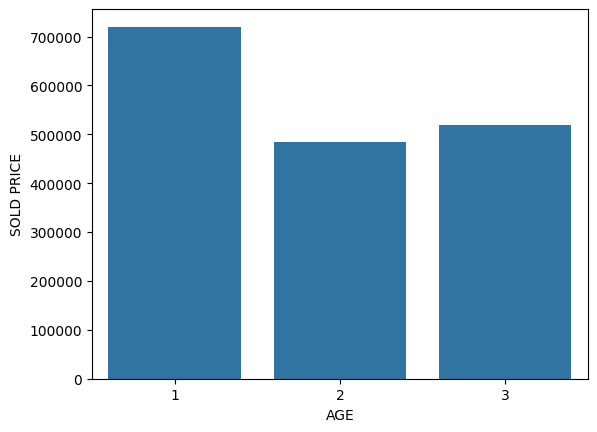

In [24]:
sn.barplot(x='AGE', y ='SOLD PRICE', data = sold_price_by_age)

<Axes: xlabel='AGE', ylabel='SOLD_PRICE_AGE_ROLE'>

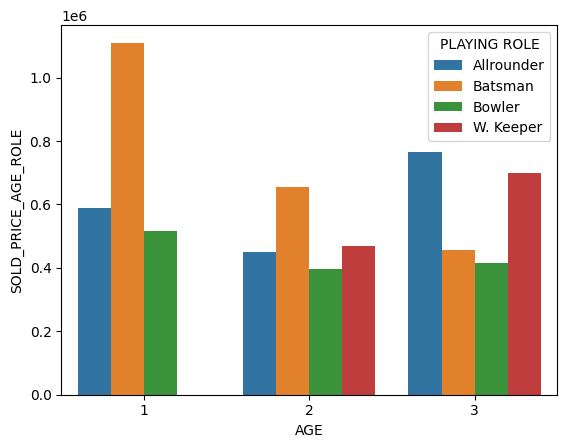

In [25]:
sn.barplot(x='AGE', y = 'SOLD_PRICE_AGE_ROLE', hue = 'PLAYING ROLE', data = sold_price_comparison)

(array([27., 32., 21., 20., 14.,  7.,  0.,  1.,  4.,  4.]),
 array([  20000.,  198000.,  376000.,  554000.,  732000.,  910000.,
        1088000., 1266000., 1444000., 1622000., 1800000.]),
 <BarContainer object of 10 artists>)

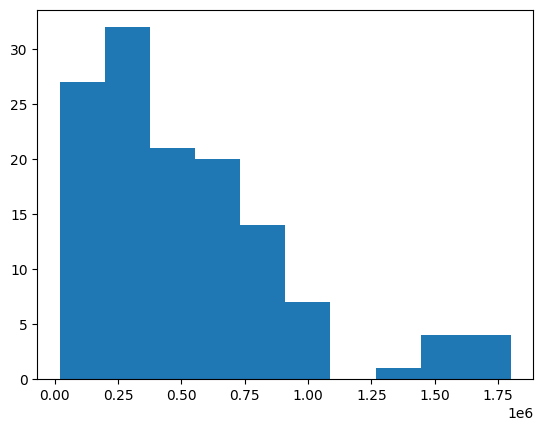

In [26]:
plt.hist(ipl_df['SOLD PRICE'])

(array([16., 11., 16., 16.,  9., 12.,  5., 15.,  8.,  6.,  6.,  1.,  0.,
         0.,  1.,  0.,  1.,  3.,  0.,  4.]),
 array([  20000.,  109000.,  198000.,  287000.,  376000.,  465000.,
         554000.,  643000.,  732000.,  821000.,  910000.,  999000.,
        1088000., 1177000., 1266000., 1355000., 1444000., 1533000.,
        1622000., 1711000., 1800000.]),
 <BarContainer object of 20 artists>)

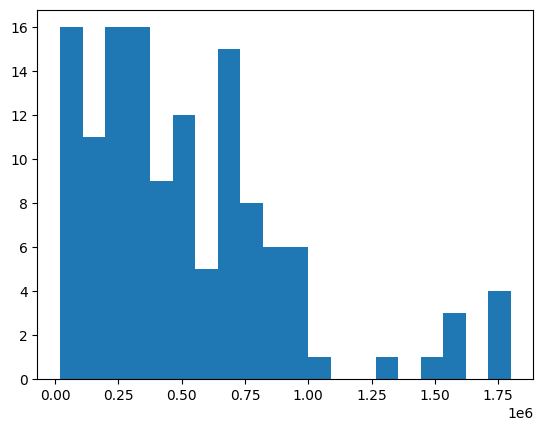

In [27]:
plt.hist(ipl_df['SOLD PRICE'], bins = 20)

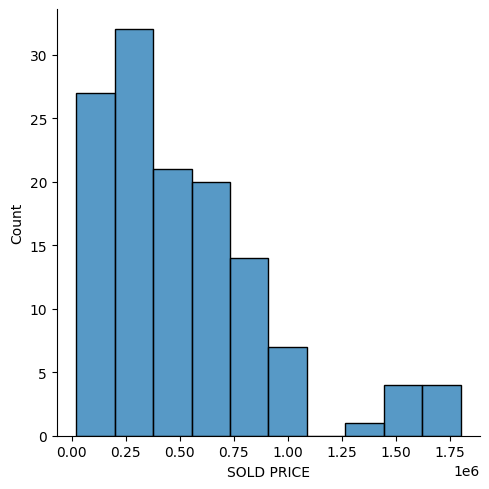

In [32]:
sn.displot(ipl_df['SOLD PRICE'])

<Axes: ylabel='SOLD PRICE'>

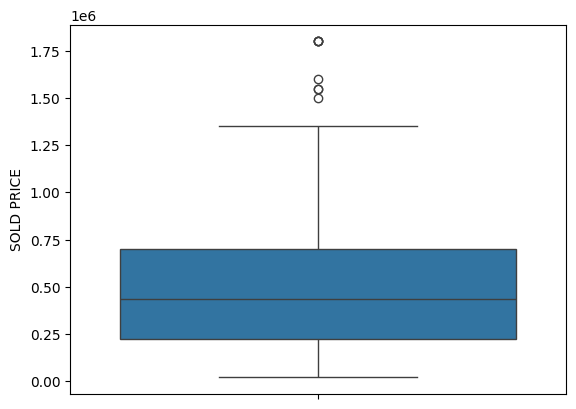

In [33]:
sn.boxplot(ipl_df['SOLD PRICE'])

[np.float64(225000.0), np.float64(700000.0)]

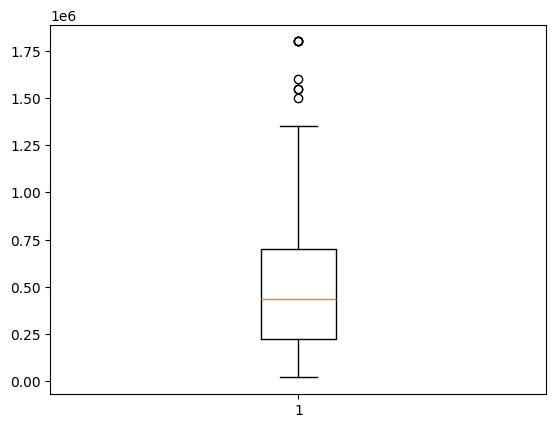

In [36]:
box = plt.boxplot(ipl_df['SOLD PRICE'])



In [39]:
[item.get_ydata()[0]for item in box['caps']]

[np.int64(20000), np.int64(1350000)]

In [37]:
[item.get_ydata()[0] for item in box['whiskers']]

[np.float64(225000.0), np.float64(700000.0)]

In [38]:
[item.get_ydata()[0] for item in box['medians']]

[np.float64(437500.0)]

In [41]:
ipl_df[ipl_df['SOLD PRICE'] > 1350000 ] [['PLAYER NAME', 'PLAYING ROLE', 'SOLD PRICE']]

,PLAYER NAME,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",W. Keeper,1500000
23,"Flintoff, A",Allrounder,1550000
50,"Kohli, V",Batsman,1800000
83,"Pietersen, KP",Batsman,1550000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
127,Yuvraj Singh,Batsman,1800000
